# Modelling the Double Pendulum

## Statement of Purpose

The double pendulum is a famous case of chaotic system that is highly sensitive to initial conditions even in the simplest model. The equations of motion that describe the double pendulum can be solved numerically and this chaotic behavior can be observed. The simple model can immediately be extended in a handful of ways: damping, driving and air resistance. This project will investigate combinations of these effects on the double pendulum and study how these extraneous effects impact the chaotic nature of the double pendulum system. Comparisons will be drawn between different combinations of these models, and animations will utilized to directly understand the effects of these model extensions.

# Assignment Portion

## Derivation of the Equations of Motion

In order the simulate the double pendulum, the equations of motion that describe the system must first be derived. The simplist approach to find these differential equations is the Lagrangian method. The Lagrangian of any system is defined by $L=T-V$, where $T$ is the total kinetic energy and $V$ is the total potential energy. Thus, we must find these by separately finding the kinetic energies of the bobs of the pendulum. 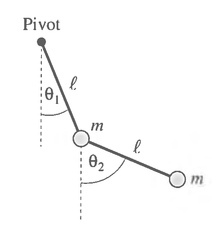
Defining the angles and masses according to the diagram above, we start by rewriting the cartesian coordinates of the bobs in terms of the polar coordinates in the diagrams. For the y-components, or heights of the bobs, the following coordinate transformations are made.  

$$ h_1 =-\ell \cos{\theta_1} h_2=-\ell (\cos{\theta_1}+\cos{\theta_2}) $$  

These equations accurately describes the heights of the bobs in terms of the polar coordinates. With these heights, we can find the total potential energy $V$, which is just the sum of the individual gravitational potential energies.  
  
$$ V = mgh_1+mgh_2 = -mg\ell(2\cos{\theta_1}+\cos{\theta_2})$$

Now, we can find the individual kinetic energies. For the first bob, it's linear velocity is simply given by it's angular velocity.  

$$v_1 = \ell\dot\theta_1$$  

However, $v_2$ is must more involved. First, we break it up into it's cartesian components:  

$$v_2^2 = \dot x^2 + \dot y^2 $$  

Next, we find $x_2$, which is given by  
$$x_2 = x_1 + \ell\sin{\theta_2} = \ell(\sin{\theta_1}+\sin{\theta_2})$$.  

Next, we take it's time derivative
$$ \dot x_2 = \ell(\cos{\theta_1}\dot\theta_1+\cos{\theta_2}\dot\theta_2) $$  
and sqaure  
$$ \dot x_2^2 = \ell^2(\cos^2{\theta_1}\dot\theta^2_1+\cos^2{\theta_2}\dot\theta^2_2+2\dot\theta_1\dot\theta_2\cos{\theta_1}\cos{\theta_2}) $$. 

Also, we need to find $\dot y^2$$.

$$ \dot y = \ell(\sin{\theta_1}\dot\theta_1+\sin{\theta_2}\dot\theta_2)$$  
$$ \dot y^2 = \ell^2(\sin^2{\theta_1}\dot\theta^2_1+\sin^2{\theta_2}\dot\theta^2_2+2\dot\theta_1\dot\theta_2\sin{\theta_1}\sin{\theta_2})$$.  

Combining these two components, we find $v_2^2$  

$$ v_2^2 = \ell^2(\cos^2{\theta_1}\dot\theta^2_1+\cos^2{\theta_2}\dot\theta^2_2+\sin^2{\theta_1}\dot\theta^2_1+\sin^2{\theta_2}\dot\theta^2_2+2\dot\theta_1\dot\theta_2\cos{\theta_1}\cos{\theta_2}+2\dot\theta_1\dot\theta_2\sin{\theta_1}\sin{\theta_2})  $$. 

In combination with the identity $\cos{\theta_1}\cos{\theta_2}+\sin{\theta_1}\sin{\theta_2} = \cos{(\theta_1-\theta_2)}$ this simplifies down to
$$ v^2_2 = \ell^2\left[\dot\theta_1^2+\dot\theta_2^2+2\dot\theta_1\dot\theta_2\cos(\theta_1-\theta_2)\right]$$.  
Now, we can form the total kinetic energy $T$:  

$$ T = \frac{1}{2}m(v^2_1+v^2_2) = m\ell^2\left[\dot\theta_1^2+\frac{1}{2}\dot\theta^2_2+\dot\theta_1\dot\theta_2\cos{(\theta_1-\theta_2)}\right] $$.

Finally, we can form the full Lagrangian $L$.   

$$L=T-V=m\ell^2\left[\dot\theta_1^2+\frac{1}{2}\theta_2^2+\dot\theta_1\dot\theta_2\cos{(\theta_1-\theta_2)}\right] $$.

With the Lagrangian, we can find the equations of motion using the Euler-Lagrange Equations:
$$ \frac{d}{dt}\left(\frac{\partial L}{\partial \dot{\theta}_1}\right) = \frac{\partial L}{\partial \theta_1}$$

$$ \frac{d}{dt}\left(\frac{\partial L}{\partial \dot{\theta}_2}\right) = \frac{\partial L}{\partial \theta_2}
$$.

Which gives the following equations of motion:

$$
2 \ddot{\theta}_1+\ddot{\theta}_2 \cos \left(\theta_1-\theta_2\right)+\dot{\theta}_2^2 \sin \left(\theta_1-\theta_2\right)+2 \frac{g}{\ell} \sin \theta_1=0
$$

$$
\ddot{\theta}_2+\ddot{\theta}_1 \cos \left(\theta_1-\theta_2\right)-\dot{\theta}_1^2 \sin \left(\theta_1-\theta_2\right)+\frac{g}{\ell} \sin \theta_2=0
$$.

This can be turned into a system of first order differential equations by the following definitions.

$$ \dot\theta_1=\omega_1$$ $$\dot\theta_2=\omega_2$$  

which changes the equations of motion into the following:

$$
2 \dot{\omega}_1+\dot{\omega}_2 \cos \left(\theta_1-\theta_2\right)+\omega_2^2 \sin \left(\theta_1-\theta_2\right)+2 \frac{\delta}{\ell} \sin \theta_1=0
$$

$$
\dot{\omega}_2+\dot{\omega}_1 \cos \left(\theta_1-\theta_2\right)-\omega_1^2 \sin \left(\theta_1-\theta_2\right)+\frac{g}{\ell} \sin \theta_2=0
$$.

Finally, these equations must be rearranged in terms of the first derivatives in order to numerically solve, which finally gives our system of equations.

$$
\dot{\omega}_1=-\frac{\omega_1^2 \sin \left(2 \theta_1-2 \theta_2\right)+2 \omega_2^2 \sin \left(\theta_1-\theta_2\right)+(g / \ell)\left[\sin \left(\theta_1-2 \theta_2\right)+3 \sin \theta_1\right]}{3-\cos \left(2 \theta_1-2 \theta_2\right)}
$$  

$$
\dot{\omega}_2=\frac{4 \omega_1^2 \sin \left(\theta_1-\theta_2\right)+\omega_2^2 \sin \left(2 \theta_1-2 \theta_2\right)+2(g / \ell)\left[\sin \left(2 \theta_1-\theta_2\right)-\sin \theta_2\right]}{3-\cos \left(2 \theta_1-2 \theta_2\right)}
$$  

With these 4 first order equations, we can find the numerical solution for the double pendulum system.

### Part a) Derive an expression for the total energy $E= T + V$ of the system in terms of the variables $\theta_1$, $\theta_2$, $\omega_1$, and $\omega_2$, plus the constants $g$, $C$, and $m$.

Total Energy is just the Langrangian with the flipped sign
$$
T = \frac{1}{2}mv_1^2 + \frac{1}{2}mv_2^2 = m\ell^2[\dot\theta_1^2+\dot\theta_2^2+2\dot\theta_1\dot\theta_2\cos({\theta_1-\theta_2})] \\
V = -mg\ell(2\cos{\theta_1}+cos{\theta_2}) \\
E=m\ell^2[\omega_1^2+\omega_2^2+2\omega_1\omega_2\cos({\theta_1-\theta_2})]-mg\ell(2\cos{\theta_1}+\cos{\theta_2})
$$

### Part b) Write a program using the fourth-order Runge-Kutta method to solve the equations of motion for the case where $\ell$= 40cm, with the initial conditions $\theta_1=\theta_2=90°$ and $\omega_1 = \omega_2 = 0$. Use your program to calculate the total energy of the system assuming that the mass of the bobs is 1kg each, and make a graph of energy as a function of time from $t= 0$ to $t= 100$ seconds. 
#### Because of energy conservation, the total energy should be constant over time (actually it should be zero for these particular initial conditions), but you will find that it is not perfectly constant because of the approximate nature of the solution of the differential equations. Choose a suitable value of the step size $h$ to ensure that the variation in energy is less than $10^{-5}$ joules over the course of the calculation.

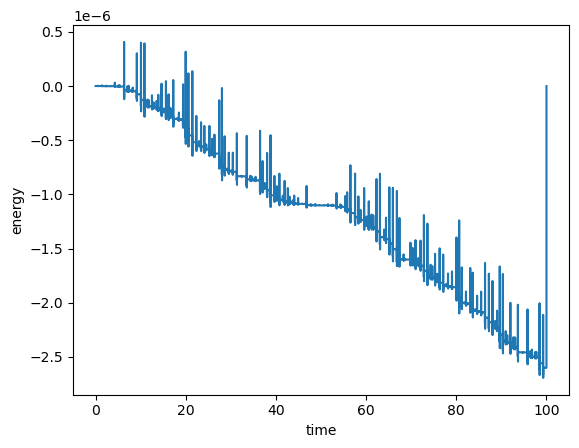

In [37]:
import numpy as np
from pylab import plot, xlabel, ylabel, show

# Define constants
g = 9.81
m = 1
l = .4

# Define derivatives of variables
def dotw1(theta1, theta2, w1, w2):
    numerator = (w1**2)*np.sin(2*theta1-2*theta2)+2*(w2**2)*np.sin(theta1-theta2)+(g/l)*(np.sin(theta1-(2*theta2))+3*np.sin(theta1))
    denominator = 3 - np.cos(2*theta1-2*theta2)
    return -numerator/denominator

def dotw2(theta1, theta2, w1, w2):
    numerator = 4*(w1**2)*np.sin(theta1-theta2)+(w2**2)*np.sin(2*theta1-2*theta2)+2*(g/l)*(np.sin((2*theta1)-theta2)-np.sin(theta2))
    denominator = 3 - np.cos(2*theta1-2*theta2)
    return numerator/denominator

#Define time domain
h=0.0015 # Chosen to maintain energy < 10^5 J
tpoints = np.arange(0, 100, h)
N = len(tpoints)

#Defining the RK4 method solution as a function with initial conditions as arguments
def RK4(theta1_0, theta2_0, w1_0, w2_0):

    # Define solution arrays
    theta1points = np.zeros(N)
    theta2points = np.zeros(N)
    w1points = np.zeros(N)
    w2points = np.zeros(N)
    energypoints = np.zeros(N)

    # Define the initial conditions
    theta1points[0] = theta1_0
    theta2points[0] = theta2_0
    w1points[0] = w1_0
    w2points[0] = w2_0
    
    #Iterate through time domain, generating solutions with RK4 method
    for n in range(N-1):
        k1theta1 = h * w1points[n]
        k1theta2 = h * w2points[n]
        k1w1 = h * dotw1(theta1points[n], theta2points[n], w1points[n], w2points[n])
        k1w2 = h * dotw2(theta1points[n], theta2points[n], w1points[n], w2points[n])

        k2theta1 = h * (w1points[n] + k1w1/2)
        k2theta2 = h * (w2points[n] + k1w2/2)
        k2w1 = h * dotw1(theta1points[n] + k1theta1/2, theta2points[n] + k1theta2/2, w1points[n] + k1w1/2, w2points[n] + k1w2/2)
        k2w2 = h * dotw2(theta1points[n] + k1theta1/2, theta2points[n] + k1theta2/2, w1points[n] + k1w1/2, w2points[n] + k1w2/2)

        k3theta1 = h * (w1points[n] + k2w1/2)
        k3theta2 = h * (w2points[n] + k2w2/2)
        k3w1 = h * dotw1(theta1points[n] + k2theta1/2, theta2points[n] + k2theta2/2, w1points[n] + k2w1/2, w2points[n] + k2w2/2)
        k3w2 = h * dotw2(theta1points[n] + k2theta1/2, theta2points[n] + k2theta2/2, w1points[n] + k2w1/2, w2points[n] + k2w2/2)

        k4theta1 = h * (w1points[n] + k3w1)
        k4theta2 = h * (w2points[n] + k3w2)
        k4w1 = h * dotw1(theta1points[n] + k3theta1, theta2points[n] + k3theta2, w1points[n] + k3w1, w2points[n] + k3w2)
        k4w2 = h * dotw2(theta1points[n] + k3theta1, theta2points[n] + k3theta2, w1points[n] + k3w1, w2points[n] + k3w2)

        theta1points[n+1] = theta1points[n] + (k1theta1 + 2*k2theta1 + 2*k3theta1 + k4theta1)/6
        theta2points[n+1] = theta2points[n] + (k1theta2 + 2*k2theta2 + 2*k3theta2 + k4theta2)/6
        w1points[n+1] = w1points[n] + (k1w1 + 2*k2w1 + 2*k3w1 + k4w1)/6
        w2points[n+1] = w2points[n] + (k1w2 + 2*k2w2 + 2*k3w2 + k4w2)/6

        energypoints[n] = (m*(l**2))*((w1points[n]**2)+1/2*(w2points[n]**2)+w1points[n]*w2points[n]*np.cos(theta1points[n]-theta2points[n]))-(m*g*l)*(2*np.cos(theta1points[n])+np.cos(theta2points[n]))
    
    return [theta1points, theta2points, w2points, w2points, energypoints]

#Calling RK4 solition with initial conditions: theta1=pi/2, theta2 = pi/2, w1 = w2 = 0
solution = RK4(np.pi/2, np.pi/2, 0, 0)
theta1points, theta2points, w2points, w2points, energypoints = solution

#Plotting Energy
plot(tpoints, energypoints, label="energy")
xlabel("time")
ylabel("energy")
show()

### Part c)

In [38]:
from vpython import sphere,vector,canvas,color,cylinder, box, rate
import time
pivot = box(pos=vector(0,0,0), size = vector(0.2, 0.01, 0.1), color=color.red)
bob1 = sphere(color=color.blue)
bob1.pos= vector(l,0, 0)
bob1.radius = 0.05
bob2 = sphere(color=color.blue)
bob2.pos= vector(2*l, 0, 0)
bob2.radius = 0.05
string1 = cylinder(pos=pivot.pos, axis=bob1.pos-pivot.pos, color=color.green, radius=0.008)
string2 = cylinder(pos=bob1.pos, axis=bob2.pos-bob1.pos, color=color.green, radius=0.008)
canvas()
#Additional line to allow for adjustment to initial conditions
solution = RK4(np.pi/2, np.pi/2, 0, 0)
theta1points, theta2points, w2points, w2points, energypoints = solution

<IPython.core.display.Javascript object>

In [4]:
#Running animation
for n in range(N):
    rate(500)
    x1 = l*np.sin(theta1points[n])
    y1 = -l*np.cos(theta1points[n])
    x2 = x1+l*np.sin(theta2points[n])
    y2 = y1-l*np.cos(theta2points[n])
    
    bob1.pos = vector(x1, y1, 0)
    bob2.pos = vector(x2, y2, 0)
    
    string1.axis = bob1.pos-pivot.pos
    string2.pos = bob1.pos
    string2.axis = bob2.pos-bob1.pos

KeyboardInterrupt: 

# Research Extension: Double Pendulum Resonance
Next, we can investigate more properties of the double pendulum. In particular, if the pivot of the double pendulum is driven side to side, there may be frequencies at which the pendulums are at resonance. In this resonance condition, we would see the bobs moving in sync for portions of their motion. For the research portion of this assignment, a numerical approach will be used to find these resonant frequencies. A direct application of a driven multibob pendulum can be seen in the stabalizing pendulums that the mirrors at the LIGO gravitational wave observatory are suspended from. In this application, finding frequencies that maximize the damping of the pendulum are desirable to reduce external vibrations in the system. This same code can be adjusted to find these optimal damping frequencies. First, the resonant frequency will be found by numerically finding the maximum average kinetic energy across a domain of frequencies.

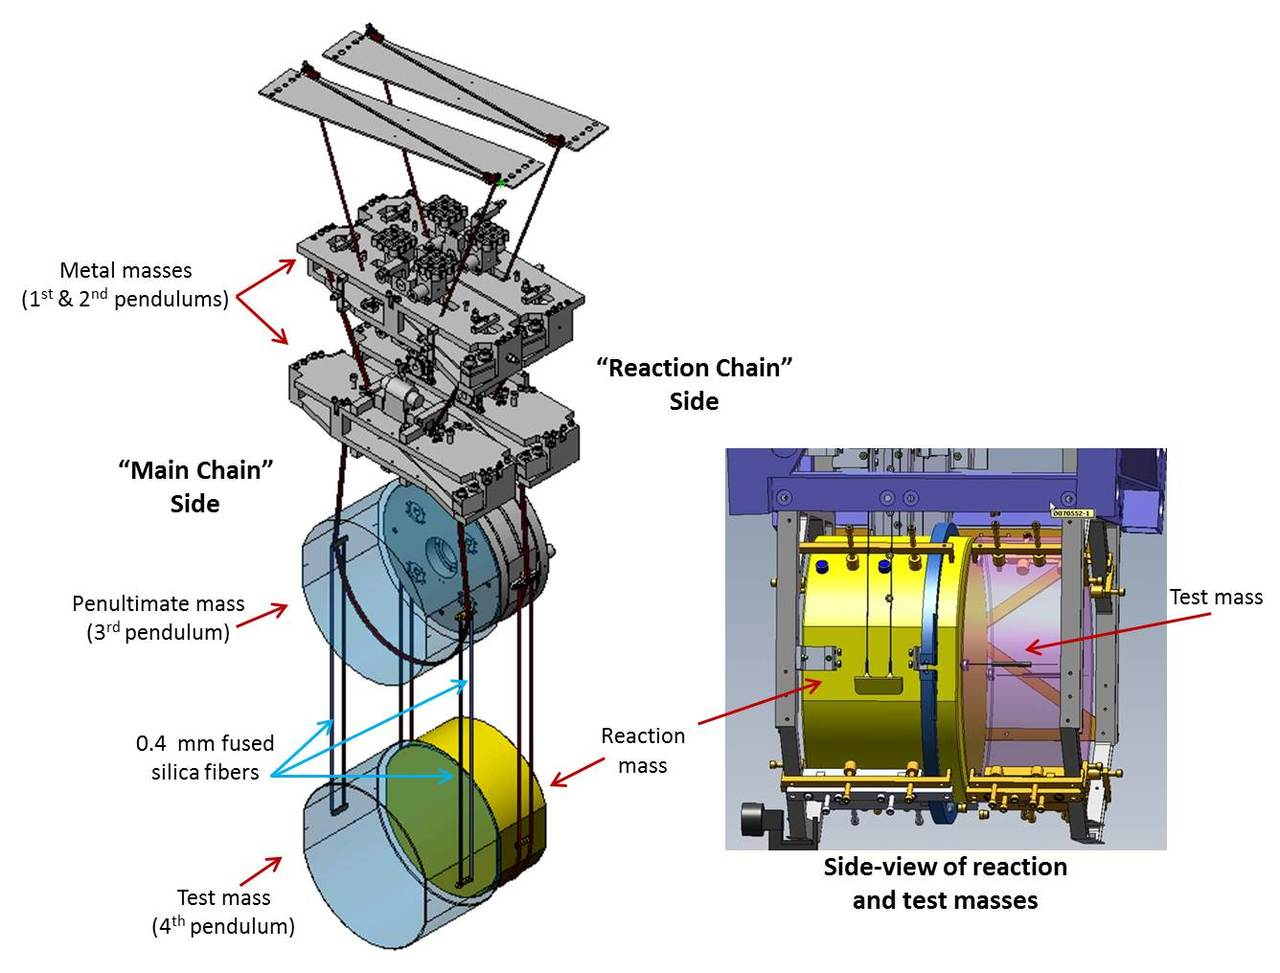

## Deriving the Equations of Motion
The pendulum can be driven side to side by adding a $Acos(\alpha t)$ to the $x_1$ term, where $A$ is the amplitude of the oscillations and $\alpha$ is the driving frequency. This complicates the Lagrangian immensley, so the Sympy Python package is utilized to derive the equations of motion without doing them out by hand. This eliminates mistakes that can be made in manual computation, which ensures a correct derivation of the equations of motion.

### The Position Functions
First, the functions that describe the position of the bobs are modified to include the driving term and mapped to Sympy functions/variables.

In [23]:
import numpy as np
import sympy as smp

#Defining sympy variables/functions:
#time, mass, gravitational constant, pendulum lengths, driving frequency, and driving amplitude variables
t, m, g, L, alpha, A = smp.symbols(r't m g \ell \alpha A')
#Defining theta1 and theta2 as functions of time
the1, the2, =  smp.symbols(r'\theta_1, \theta_2 ', cls=smp.Function)

#Defining the derivatives with respect to time
the1 = the1(t)
the1_d = smp.diff(the1, t)
the1_dd = smp.diff(the1_d, t)
the2 = the2(t)
the2_d = smp.diff(the2, t)
the2_dd = smp.diff(the2_d, t)

#Defining the position function variables
x1, y1, x2, y2 = smp.symbols('x_1, y_1, x_2, y_2', cls=smp.Function)
#x1, y1 are functions of t and theta1
x1= x1(t, the1)
y1= y1(t, the1)
#x2 and y2 are functions of t, theta1, and theta2
x2= x2(t, the1, the2)
y2= y2(t, the1, the2)

#Defining the actual position functions
x1 = A*smp.cos(alpha*t)+L*smp.sin(the1)
y1 = -L*smp.cos(the1)
x2 = A*smp.cos(alpha*t)+L*(smp.sin(the1) + smp.sin(the2))
y2 = -L*(smp.cos(the1)+smp.cos(the2))

### The Lagrangian and Total Energy
Here, the Lagrangian and Total Energy functions are found with Sympy.

In [24]:
#Defining the Lagrangian and total energy in terms of Sympy functions
T = m/2 *(smp.diff(x1, t)**2 + smp.diff(y1, t)**2) + m/2 * (smp.diff(x2, t)**2 + + smp.diff(y2, t)**2)
V = (m*g*y1 + m*g*y2).simplify()
Lag = T-V
E = T+V

### The Equations of Motion
Now, the equations of motion are found by the Euler-Lagrange equations in Sympy. The resultant equations of motion are converted to lambda functions using smp.lambdify() so they can be numerically evaluated by the RK4 solver later.

In [25]:
#Equations of Motion
LE1 = smp.diff(Lag, the1) - smp.diff(smp.diff(Lag, the1_d), t)
LE1 = LE1.simplify()

LE2 = smp.diff(Lag, the2) - smp.diff(smp.diff(Lag, the2_d), t)
LE2 = LE2.simplify()

#Solving Equations of motion for second derivatives where LE1, LE2 = 0
sols = smp.solve([LE1, LE2], (the1_dd, the2_dd), simplify=False, rational=False)

#Converting Equations of Motion to Lambda Functions
eq1 = smp.lambdify((t, alpha, A, L, g, the1, the2, the1_d, the2_d), sols[the1_dd])
eq2 = smp.lambdify((t, alpha, A, L, g, the1, the2, the1_d, the2_d), sols[the2_dd])
tot = smp.lambdify((t, alpha, A, L, g, m, the1, the2, the1_d, the2_d), E)
#sols[the1_dd]

### Defining the Equations of Motion Functions with Initial Conditions
Here, inital conditions for the system are defined. Also, the first order equations of motion that describe $\dot\omega_1$ and $\dot\omega_2$ are defined in terms of the lambda functions, as well as the total energy function.

In [26]:
#Defining system conditions
grav = 9.81
amp = .2
mass = 1
length = 1

#Defining first-order differential equations and energy functions
def dotw1(theta1, theta2, w1, w2, time, freq):
    return float(eq1(time, freq, amp, length, grav, theta1, theta2, w1, w2))

def dotw2(theta1, theta2, w1, w2, time, freq):
    return float(eq2(time, freq, amp, length, grav, theta1, theta2, w1, w2))

def energy(theta1, theta2, w1, w2, time, freq):
    return float(tot(time, freq, amp, length, grav, mass, theta1, theta2, w1, w2))

### Solving Modified Differential Equations with RK4 Method
The equations of motion are solved using the same RK4 that was used previously. However, the RK4 function is modified to have the driving frequency as an input parameter. This way the system can be solved across a domain of driving frequencies. The system is defined by an upper bound of 200 seconds. A static resonant condition probably does not exist since the pendulum will go out of resonance once high angles are reached.

In [27]:
#Step size
h=.01
#Upper time bound
t_f = 200
#Defining the Time Domain
tpoints = np.arange(0, t_f, h)
N = len(tpoints)

#Defining the RK4 method solution as a function with initial conditions as arguments
def RK4(theta1_0, theta2_0, w1_0, w2_0, freq):
    # Define solution arrays
    theta1points = np.zeros(N)
    theta2points = np.zeros(N)
    w1points = np.zeros(N)
    w2points = np.zeros(N)
    energypoints = np.zeros(N)

    # Define the initial conditions
    theta1points[0] = theta1_0
    theta2points[0] = theta2_0
    w1points[0] = w1_0
    w2points[0] = w2_0
    
    #Iterate through time domain, generating solutions with RK4 method
    for n in range(N-1):
        k1theta1 = h * w1points[n]
        k1theta2 = h * w2points[n]
        k1w1 = h * dotw1(theta1points[n], theta2points[n], w1points[n], w2points[n], tpoints[n], freq)
        k1w2 = h * dotw2(theta1points[n], theta2points[n], w1points[n], w2points[n], tpoints[n], freq)

        k2theta1 = h * (w1points[n] + k1w1/2)
        k2theta2 = h * (w2points[n] + k1w2/2)
        k2w1 = h * dotw1(theta1points[n] + k1theta1/2, theta2points[n] + k1theta2/2, w1points[n] + k1w1/2, w2points[n] + k1w2/2, tpoints[n], freq)
        k2w2 = h * dotw2(theta1points[n] + k1theta1/2, theta2points[n] + k1theta2/2, w1points[n] + k1w1/2, w2points[n] + k1w2/2, tpoints[n], freq)

        k3theta1 = h * (w1points[n] + k2w1/2)
        k3theta2 = h * (w2points[n] + k2w2/2)
        k3w1 = h * dotw1(theta1points[n] + k2theta1/2, theta2points[n] + k2theta2/2, w1points[n] + k2w1/2, w2points[n] + k2w2/2, tpoints[n], freq)
        k3w2 = h * dotw2(theta1points[n] + k2theta1/2, theta2points[n] + k2theta2/2, w1points[n] + k2w1/2, w2points[n] + k2w2/2, tpoints[n], freq)

        k4theta1 = h * (w1points[n] + k3w1)
        k4theta2 = h * (w2points[n] + k3w2)
        k4w1 = h * dotw1(theta1points[n] + k3theta1, theta2points[n] + k3theta2, w1points[n] + k3w1, w2points[n] + k3w2, tpoints[n], freq)
        k4w2 = h * dotw2(theta1points[n] + k3theta1, theta2points[n] + k3theta2, w1points[n] + k3w1, w2points[n] + k3w2, tpoints[n], freq)

        theta1points[n+1] = theta1points[n] + (k1theta1 + 2*k2theta1 + 2*k3theta1 + k4theta1)/6
        theta2points[n+1] = theta2points[n] + (k1theta2 + 2*k2theta2 + 2*k3theta2 + k4theta2)/6
        w1points[n+1] = w1points[n] + (k1w1 + 2*k2w1 + 2*k3w1 + k4w1)/6
        w2points[n+1] = w2points[n] + (k1w2 + 2*k2w2 + 2*k3w2 + k4w2)/6

        energypoints[n] = energy(theta1points[n], theta2points[n], w1points[n], w2points[n], tpoints[n], freq)
    print(f'Solved for {N} time points at frequency {freq}')
    return [theta1points, theta2points, w1points, w2points, energypoints]

#Calling RK4 solition with at rest initial conditions and arbitrary driving frequency
theta1_0, theta2_0, w1_0, w2_0, freq = 0.0, 0.0, 0.0, 0.0, 1.15
solution = RK4(theta1_0, theta2_0, w1_0, w2_0, freq)
theta1points, theta2points, w1points, w2points, energypoints = solution

Solved for 20000 time points at frequency 1.15


### Plotting Energy and theta1 Solutions for Arbitrary Driving Frequency
The energy and theta1 solutions were plotted against time, and interestingly enough the energy appears to oscillate near a constant value, indicating that the energy is varying as the driver increases and decreases the total energy of the system. In the theta1 graph, there doesn't appear to be any stable patterns that would indicate resonance.

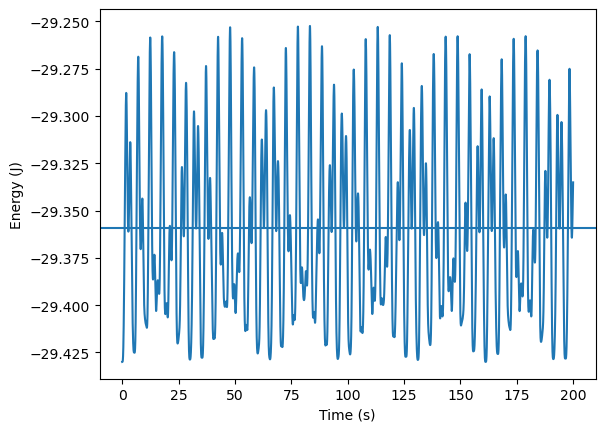

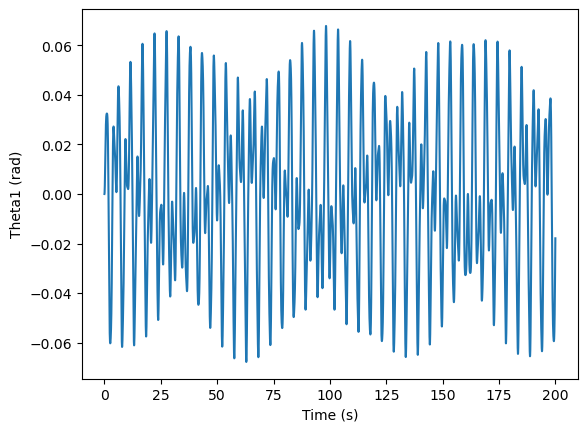

In [28]:
from pylab import plot, xlabel, ylabel, show, axvline, axhline

#Plotting Energy (last point not included to remove inconsistent energy at end of time range)
plot(tpoints[0:-1], energypoints[0:-1], label="energy")
axhline(y=np.mean(energypoints))
xlabel("Time (s)")
ylabel("Energy (J)")
show()

#Plotting Theta1
plot(tpoints, theta1points)
xlabel("Time (s)")
ylabel("Theta1 (rad)")
show()

### Finding Average Kinetic Energy (This takes some time to run ~3 min)
The average kinetic energy will serve as the numerical indication of the resonant frequencies of the driven double pendulum. Across a domain of driving frequencies, the equations of motion are solved and the average kinetic energy is found at each driving frequency.

### The Velocity Functions in Terms of Lambda Functions
The velocity functions are just the derivatives of the cartesian derivative functions. Here the smp.lambdify() function is used to convert the derivatives of the position functions (the velocity functions) from Sympy functions into numerical lambda functions. This will be utilitzed to find the average kinetic energy of the system across a time domain.

In [29]:
vx1_f = smp.lambdify((t,alpha, A, L, the1,the2,the1_d,the2_d), smp.diff(x1, t))
vx2_f = smp.lambdify((t,alpha, A, L, the1,the2,the1_d,the2_d), smp.diff(x2, t))
vy1_f = smp.lambdify((t,alpha, A, L, the1,the2,the1_d,the2_d), smp.diff(y1, t))
vy2_f = smp.lambdify((t,alpha, A, L, the1,the2,the1_d,the2_d), smp.diff(y2, t))

In [30]:
def avgKE(freq):
    #print(freq)
    tpoints = np.linspace(0, t_f, N)
    solution = RK4(theta1_0, theta2_0, w1_0, w2_0, freq)
    theta1points, theta2points, w1points, w2points, energypoints = solution
    vx1 = vx1_f(tpoints, freq, amp, length, theta1points, theta2points, w1points, w2points)
    vx2 = vx2_f(tpoints, freq, amp, length, theta1points, theta2points, w1points, w2points)
    vy1 = vy1_f(tpoints, freq, amp, length, theta1points, theta2points, w1points, w2points)
    vy2 = vy2_f(tpoints, freq, amp, length, theta1points, theta2points, w1points, w2points)
    return 1/2*np.mean(vx1**2+vx2**2+vy1**2+vy2**2) 

freqpoints = np.linspace(0.4, 8, 50)
avgKEpoints = np.vectorize(avgKE)(freqpoints)
maxKEfreq = freqpoints[np.argmax(avgKEpoints)]
print(f'Resonant Frequency: {maxKEfreq}')

Solved for 20000 time points at frequency 0.4
Solved for 20000 time points at frequency 0.4
Solved for 20000 time points at frequency 0.5551020408163265
Solved for 20000 time points at frequency 0.7102040816326531
Solved for 20000 time points at frequency 0.8653061224489796
Solved for 20000 time points at frequency 1.0204081632653061
Solved for 20000 time points at frequency 1.1755102040816325
Solved for 20000 time points at frequency 1.3306122448979592
Solved for 20000 time points at frequency 1.4857142857142858
Solved for 20000 time points at frequency 1.6408163265306124
Solved for 20000 time points at frequency 1.795918367346939
Solved for 20000 time points at frequency 1.9510204081632652
Solved for 20000 time points at frequency 2.1061224489795918
Solved for 20000 time points at frequency 2.2612244897959184
Solved for 20000 time points at frequency 2.416326530612245
Solved for 20000 time points at frequency 2.571428571428571
Solved for 20000 time points at frequency 2.7265306122448

### Plotting the Average Kinetic Energy Against the Frequency Domain
As seen in the graph, there is a sharp peak in average kinetic energy at a frequency of 2.416. This indicates that this is a resonant frequency for the system. This means that across the 200 second time domain, the driving frequency induced a maximum average kinetic energy, which we will take to be our resonance condition.

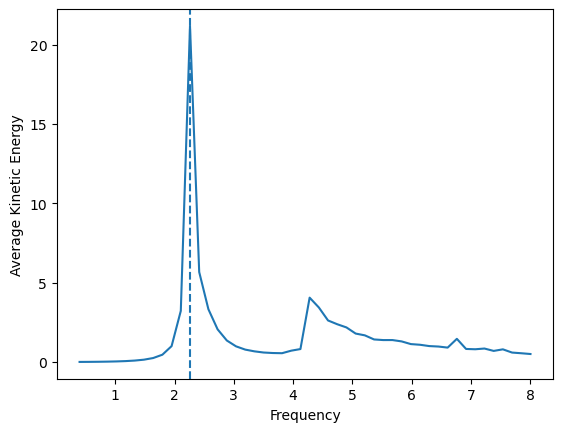

In [31]:
from pylab import axvline
plot(freqpoints, avgKEpoints)
axvline(x=maxKEfreq, ls='--')
xlabel("Frequency")
ylabel("Average Kinetic Energy")
show()

### Finding the Solution at Resonance
By observing the solution plots, there is a very clear beat frequency phenomenon going on at the resonant driving frequency. The energy is oscillating very clearly with the beat frequency; this indicates that the resonance of the system is oscillating back and forth according to these beat frequencies. To elimimate these beat frequencies and achieve a constant resonance condition, the driving frequency clearly needs to vary with time.

Solved for 20000 time points at frequency 2.2612244897959184


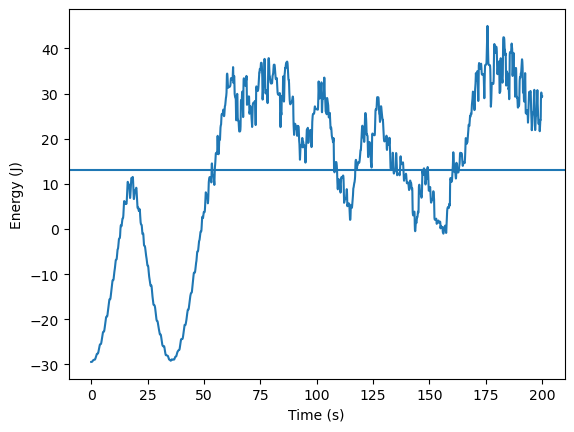

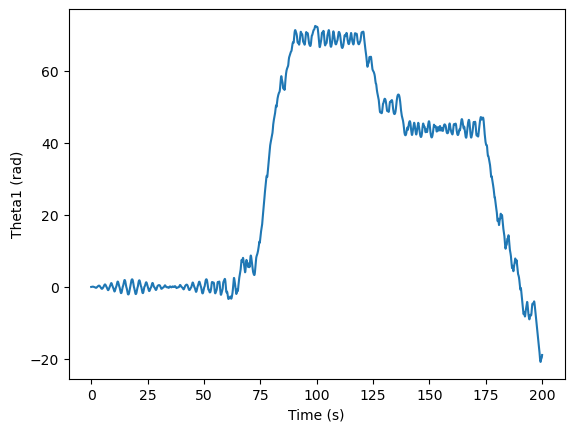

In [32]:
#Calculating the Solution at the Resonant Frequency
solution = RK4(theta1_0, theta2_0, w1_0, w2_0, maxKEfreq)
theta1points, theta2points, w1points, w2points, energypoints = solution

#Plotting Energy (last point not included to remove inconsistent energy at end of time range)
plot(tpoints[0:-1], energypoints[0:-1], label="energy")
axhline(y=np.mean(energypoints))
xlabel("Time (s)")
ylabel("Energy (J)")
show()

#Plotting Theta1
plot(tpoints, theta1points)
xlabel("Time (s)")
ylabel("Theta1 (rad)")
show()

### Animating the Resonant Solution

In [33]:
#Setting up vpython animation
from vpython import sphere,vector,canvas,color,cylinder, box, rate
import time

x1 = length*np.sin(theta1points[0])+amp*np.cos(freq*tpoints[0])
y1 = -length*np.cos(theta1points[0])
x2 = x1+length*np.sin(theta2points[0])
y2 = y1-length*np.cos(theta2points[0])

pivot = box(pos=vector(amp ,0,0), size = vector(1, .1, .1), color=color.red)
bob1 = sphere(color=color.blue)
bob1.pos= vector(x1, y1, 0)
bob1.radius = .15
bob2 = sphere(color=color.blue)
bob2.pos= vector(x2, y2, 0)
bob2.radius = .15
string1 = cylinder(pos=pivot.pos, axis=bob1.pos-pivot.pos, color=color.green, radius=0.008)
string2 = cylinder(pos=bob1.pos, axis=bob2.pos-bob1.pos, color=color.green, radius=0.008)
canvas()

<IPython.core.display.Javascript object>

In [ ]:
#Running animation
for n in range(N):
    #print(n)
    rate(150)
    
    pivot.pos = vector(amp*np.cos(freq*tpoints[n]), 0, 0)
    
    #time.sleep(0.5)
    x1 = length*np.sin(theta1points[n])+amp*np.cos(freq*tpoints[n])
    y1 = -length*np.cos(theta1points[n])
    x2 = x1+length*np.sin(theta2points[n])
    y2 = y1-length*np.cos(theta2points[n])
    
    bob1.pos = vector(x1, y1, 0)
    bob2.pos = vector(x2, y2, 0)
    
    string1.pos = pivot.pos
    string1.axis = bob1.pos-pivot.pos
    string2.pos = bob1.pos
    string2.axis = bob2.pos-bob1.pos

## Conclusion

In conclusion, the RK4 method successfully generated a numerical solution for the double pendulum. In addition, the resonant frequencies of the pivot-driven double pendulum were obtained using numerical techniques by obtaining the driving frequency that maximizes the average kinetic energy of the system. While a constant driving frequency cannot produce a constant resonance condition, a beat frequency was found that had the system oscillating in and out of resonance. This is an inherent feature of the driven double pendulum; perhaps a static resonance condition could be found by varying the driving frequency with time. These static resonance conditions would be directly applicable to finding a maximal damping case where the average kinetic energy is minimized to 0 over time. Overall, these numerical approaches are extremely useful for solving the chaotic double pendulum, as well as understanding the resonant behaviors of the driving double pendulum system.